#☀️ Dublin Weather Daily Data Visualization and Analysis(2022-2024)
*Data resource: Met Éireann(Ireland's National Meteralogical Serivice) https://data.gov.ie/dataset/dublin-airport-daily-data/resource/1b93c37c-f2fa-4c79-827f-ec53a7db56b0*  
  
    
Since I came to Ireland last autumn, the weather here has always been a topic of conversation between my friends and me. The hydrating mist-like rain, the stretching clouds, and the occasionally appearing shining sun amid the rain drive me crazy as I try to find a pattern in it. This CA clearly provides a great opportunity to explore that further.

##🌡️ EDA  
### 🛰️Dataset Overview

This table contains daily meteorological elements measured at the **Dublin Airport** from January 1st 2022 to December 31st 2024.  



In [2]:
#First of all, import python libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load dataset
df = pd.read_csv("weather.csv")

# View front 10 rows, learn the basics
df.head(10)

,date,maxtp,mintp,rain,cbl,wdsp,hg,sun,g_rad,pe,evap
0,2022/1/1,14.8,9.7,0.0,994.0,14.8,40,5.3,288,0.9,0.9
1,2022/1/2,10.8,8.1,0.1,992.4,11.7,32,3.1,245,0.8,0.9
2,2022/1/3,9.8,2.1,1.8,990.9,12.3,30,4.0,256,0.7,0.8
3,2022/1/4,3.8,-0.3,0.0,997.5,12.0,23,5.7,307,0.4,0.4
4,2022/1/5,5.3,-0.8,0.0,1006.1,8.4,19,4.6,321,0.4,0.5
5,2022/1/6,9.0,-0.1,3.5,1000.0,11.2,31,1.3,139,0.6,0.8
6,2022/1/7,6.8,0.3,2.7,997.4,9.2,24,1.4,150,0.3,0.5
7,2022/1/8,9.5,2.1,2.3,990.1,12.6,30,2.4,226,0.3,0.3
8,2022/1/9,7.4,1.6,0.2,992.1,9.1,24,1.9,242,0.3,0.4
9,2022/1/10,12.1,6.2,0.7,1004.3,6.5,20,0.1,204,0.3,0.4


In [4]:
# Get a clear view of the columns
df.columns.to_list()

['date',
 'maxtp',
 'mintp',
 'rain',
 'cbl',
 'wdsp',
 'hg',
 'sun',
 'g_rad',
 'pe',
 'evap']

Below is a description of measured data:  
- `date`: Date of observation (from 2022 to 2024)  
- `maxtp`: Maximum air temperature recorded during the day(°C)  
- `mintp`: Minimum air temperature recorded during the day(°C)   
- `rain`: Total precipitation amount(mm)
- `cbl`: Mean Convective Boundary Layer pressure(hPa)
- `wdsp`: Mean wind speed over the day(knots (kt))
- `hg`: Highest gust (maximum wind burst recorded)(knots (kt))
- `sun`: Sunshine duration(hours)
- `g_rad`: Global solar radiation(J/cm²)
- `pe`: Potential evapotranspiration(mm)
- `evap`: Actual evaporation(mm)


In [5]:
# Get the basic information of the dataset

# Number of rows and columns
print("Shape of data:", df.shape)
# Add a line break for readability
print()

# Brief summary of the data
# Number difference between Non-Null Count and RangeIndex could tell if there's missing data
# Knowing data types allow us for further processing
print("Data summary:")
df.info()

Shape of data: (1096, 11)

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1096 non-null   object 
 1   maxtp   1094 non-null   float64
 2   mintp   1095 non-null   float64
 3   rain    1096 non-null   float64
 4   cbl     1096 non-null   float64
 5   wdsp    1096 non-null   float64
 6   hg      1096 non-null   int64  
 7   sun     1096 non-null   float64
 8   g_rad   1096 non-null   int64  
 9   pe      1096 non-null   float64
 10  evap    1096 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 94.3+ KB


- There are 11 columns in the dataset, 10 of them are numerical, 1 is date.
- From the number difference between non-null count and number of row,we could know there's missing data in `maxtp` and `mintp`

###🌊Data Cleaning
Since there's missing data, basic data cleaning about the missing value
should be performed.

In [6]:
# First, check the missing values
print("Missing values:")
missing_values = df.isnull().sum()
print(missing_values)

Missing values:
date     0
maxtp    2
mintp    1
rain     0
cbl      0
wdsp     0
hg       0
sun      0
g_rad    0
pe       0
evap     0
dtype: int64




 #### 🌤️Solution for Missing Values
 From the output above and the `dtype` we know from `info()`, missing values were all in numerical columns(`maxtp`,`mintp`).

 1. Mean of neighbor value  

 Since this dataset is a record of weather through the whole year listed in the order of date, I think it's more reasonable to fill the missing value with the mean of it's previous and next value which does not significantly affect the overall distribution or trend, also weather patterns are seasonal, nearby days usually have similar conditions.  

 Imperfection: the possibility of neighbor value is one of the extreme weather record.

 2. Mean of the season value

 Same as the reason above, seasonal temperature records are basically under same condition. And using sesonal mean also avoid the extreme neighbor value situation.

 Imperfection: the extreme value still influence the mean the the season.

 3. Median of the season 🌞

 Avoid the influence of extreme value and maintain the reasonability of using seasonal data.And using median also decreased the influence of extreme value.

 4. Delete the record row   
 Since the method above could fix the missing value problem, it's better not delete the whole row since the records of other columns still participants in the whole dataset.










In [7]:
# Then, perform after have an idea of what should do to the missing vlaue
# To avoid changing the original dataset, here a new dataframe is created
df_new = df.copy()
# Define function for grouping date by season
def get_season_from_date(date_str):
    try:
        month = pd.to_datetime(date_str).month
    except:
        return None
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Define a variable to represent the season of each row
season_series = df_new['date'].apply(get_season_from_date)

# This function could only be applied to numerical columns
numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns

# Group record by season, then fill the missing value
for col in numeric_cols:
    df_new[col] = df_new[col].fillna(
        df_new.groupby(season_series)[col].transform('median')
    )

# Save the filled csv file
df_new.to_csv("weather_filled.csv", index=False)

# See if it worked
df_new.isnull().sum()



,0
date,0
maxtp,0
mintp,0
rain,0
cbl,0
wdsp,0
hg,0
sun,0
g_rad,0
pe,0


- `filla()` is a specified method used to fill NA/NaN values provided by pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

### 🌦️Further Exploration

In [8]:
# Brief summary for the filled dataset
print("Data summary after filling missing values:")
df_new.info()

Data summary after filling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1096 non-null   object 
 1   maxtp   1096 non-null   float64
 2   mintp   1096 non-null   float64
 3   rain    1096 non-null   float64
 4   cbl     1096 non-null   float64
 5   wdsp    1096 non-null   float64
 6   hg      1096 non-null   int64  
 7   sun     1096 non-null   float64
 8   g_rad   1096 non-null   int64  
 9   pe      1096 non-null   float64
 10  evap    1096 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 94.3+ KB


In [9]:
# Then, descriptive statistics of dataset for furthur exploration
print("Descriptive statistics:")
print(df_new.describe())

Descriptive statistics:
             maxtp        mintp         rain          cbl         wdsp  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     14.124179     6.602281     2.152007  1002.758212     9.087226   
std       4.876194     4.424703     4.499067    12.185368     3.279228   
min       0.300000    -5.100000     0.000000   961.700000     3.000000   
25%      10.600000     3.400000     0.000000   995.500000     6.600000   
50%      14.200000     6.900000     0.200000  1003.500000     8.750000   
75%      17.725000    10.000000     2.200000  1011.200000    11.000000   
max      29.100000    17.400000    48.600000  1034.100000    29.200000   

                hg          sun        g_rad           pe         evap  
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000  
mean     24.446168     4.002737   983.432482     1.552920     2.184763  
std       8.094354     3.645430   726.221971     1.056189     1.519870  
min       9.00000

####Analysis of Main Descriptive Statistics
1. `maxtp`, `mintp` : max temprature mostly fall between the range of 10.60 to 17.72(25%, 75%), min temperature falls between the range of 3.40 to 10.00(25%, 75%), which means most of the time the temperature in dublin is over 0 and under 20, quite mild.  
2. `rain`: the `max` os rain fall is 48.6, while the `standard deveation` is 4.49 and `75%` of the rainfall record is lower than 2.20, which means the `max` record is either an extreme weather day or an outlier. And `50%` is 0.20 means that most of the days in dublin are rainy. Based on the rainfall classification of WHO, that 0.1mm to 2.4mm rainfall per 24h is that range of light rain, those rainy days were considered lightly rained.  
3. `sun`: sunshine duration has a pretty large range, and the `max` record seems really high. For complex data like this, we'll need further exploration, and visualization could be a good way.

#### 🌈 Graphical Summaries for each of the weather measurements
*The project that helped with the logic and code of this part of layout:
https://www.kaggle.com/datasets/hrishitabapuram/irish-weather-2022-historic*

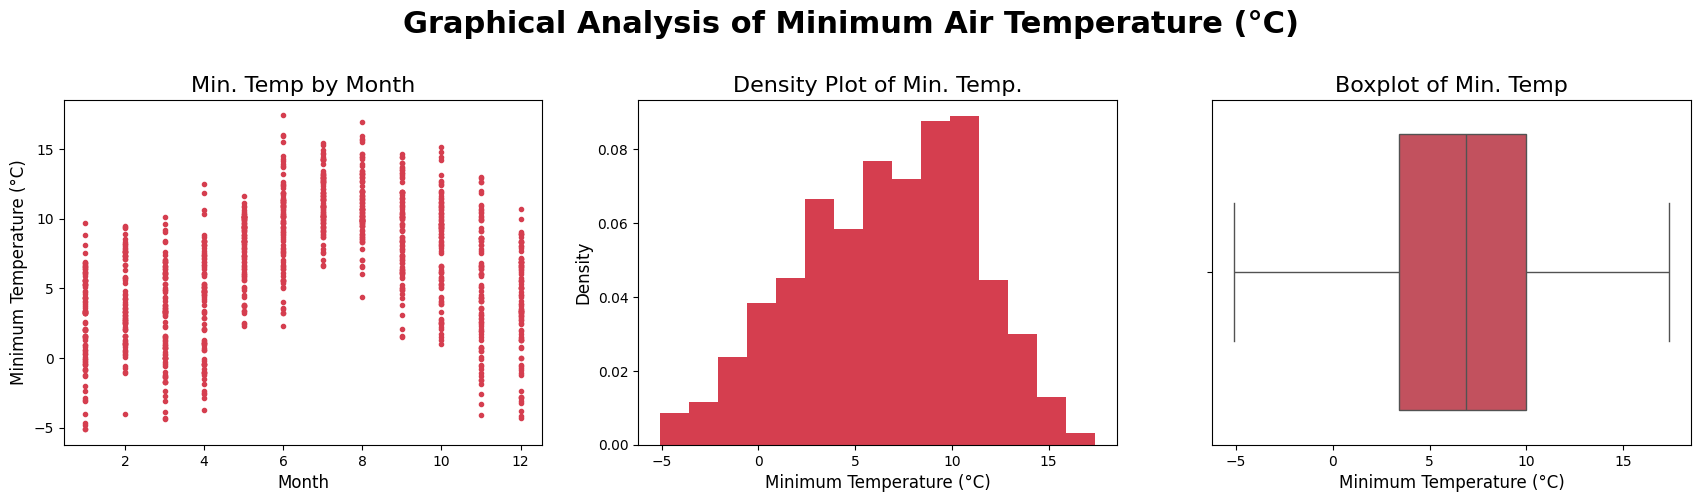

In [23]:
import seaborn as sns

df_new['date'] = pd.to_datetime(df_new['date'])
month = df_new['date'].dt.month
mintp = df_new['mintp']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Minimum Air Temperature (°C)", fontsize=22, fontweight="bold")
plt.subplots_adjust(hspace=0.4, top=0.8)

# scattering plot
plt.subplot(1,3,1)
plt.title("Min. Temp by Month", fontsize=16)
plt.plot(month, mintp, '.', color='#d53e4f')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Minimum Temperature (°C)", fontsize=12)

# histgram
plt.subplot(1,3,2)
plt.hist(mintp, density=True, bins=15, color='#d53e4f')
plt.title("Density Plot of Min. Temp.", fontsize=16)
plt.xlabel("Minimum Temperature (°C)", fontsize=12)
plt.ylabel("Density", fontsize=12)

# boxplot
plt.subplot(1,3,3)
sns.boxplot(data=df_new, x='mintp', color='#d53e4f')
plt.title("Boxplot of Min. Temp", fontsize=16)
plt.xlabel("Minimum Temperature (°C)", fontsize=12)

plt.show()


1. Scatter Plot
- Lowest minimum temperatures occur in January, February, and December, with some data points below 0°C.
- Highest minimums are in June to August, often above 10°C.
- Indicates a typical temperate climate with warm summers and mild winters.

2. Histgram
- Most minimum temperatures are concentrated between 5°C and 12°C.
- Distribution is slightly right-skewed, with fewer very low or very high minimums.
- Extremely cold days are rare.

3. Boxplot
- The IQR is from 4°C to 10°C, means that 50% of the values in this range.
- Median minimum temperature is around 7°C–8°C.

Text(0.5, 0, 'Maximum Temperature (°C)')

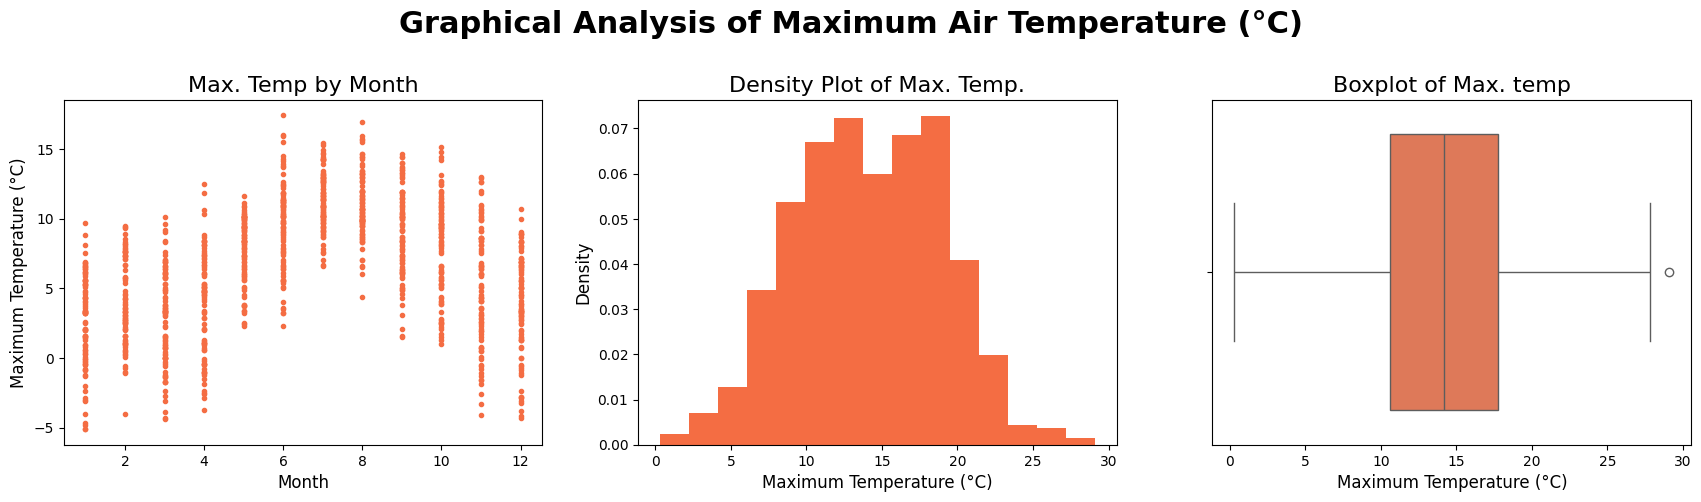

In [11]:
maxtp = df_new['maxtp']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Maximum Air Temperature (°C)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Max. Temp by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#f46d43')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Maximum Temperature (°C)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(maxtp, density = True, bins = 15, color = '#f46d43')
plt.title("Density Plot of Max. Temp.", fontsize = 16)
plt.xlabel("Maximum Temperature (°C)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'maxtp', color = '#f46d43')
plt.title("Boxplot of Max. temp", fontsize = 16)
plt.xlabel("Maximum Temperature (°C)", fontsize = 12)




1. Scatter Plot
- Lowest maximum temperatures occur in January, February, and December, with some data points near or below 0°C.
- Highest maximum temperatures are in June to August, often reaching 15°C or above.
- Suggests a temperate climate with cool summers and mild winters.

2. Histgram
- Most maximum temperatures are concentrated between 10°C and 18°C.
- Distribution is slightly right-skewed, with a few hot days approaching 30°C.
- Extremely hot days are rare.

3. Boxplot
- The IQR is from 10°C to 18°C, meaning that 50% of the values fall within this range.
- Median maximum temperature is around 14°C–15°C.

Text(0.5, 0, 'Maximum Temperature (C)')

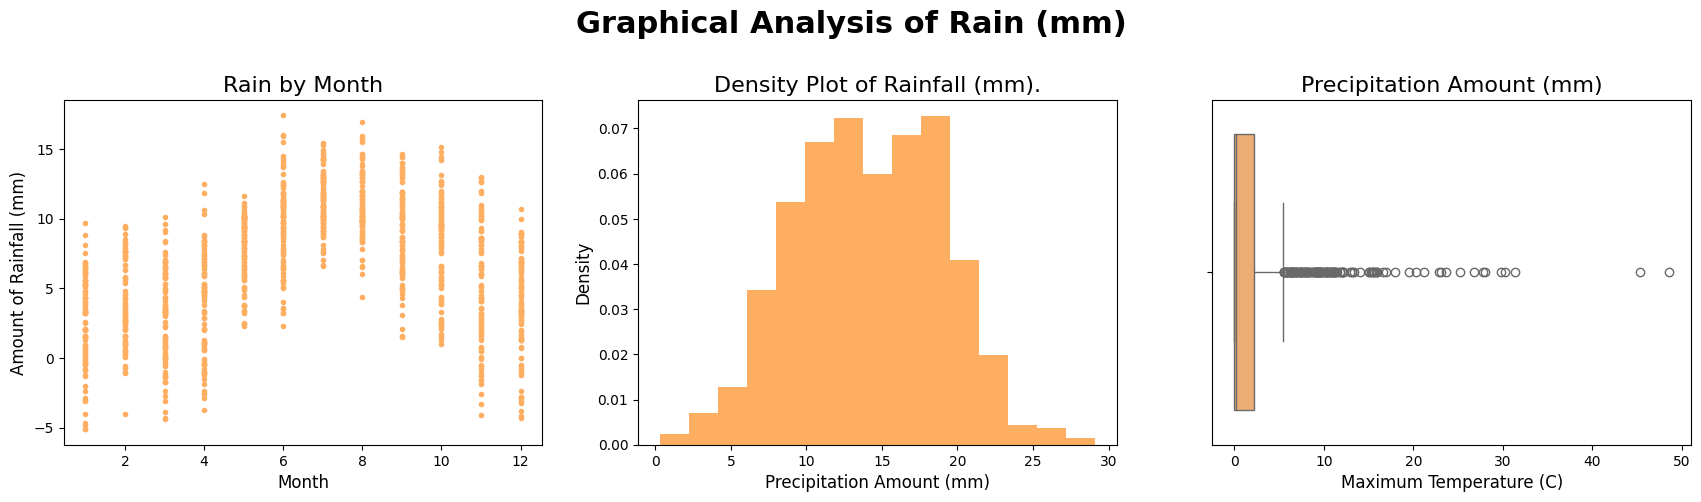

In [12]:
rain = df_new['rain']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Rain (mm)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Rain by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#fdae61')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Amount of Rainfall (mm)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(maxtp, density = True, bins = 15, color = '#fdae61')
plt.title("Density Plot of Rainfall (mm).", fontsize = 16)
plt.xlabel("Precipitation Amount (mm)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'rain', color = '#fdae61')
plt.title("Precipitation Amount (mm)", fontsize = 16)
plt.xlabel("Maximum Temperature (C)", fontsize = 12)




1. Scatter Plot
- Daily rainfall is recorded throughout the year, with slightly higher values in summer months (June to August).  
- Most values range between 0 mm and 15 mm, though some points exceed this.  
- Indicates that while rain is common, extreme rainfall is relatively infrequent.

2. Histogram
- Most daily rainfall amounts are concentrated between 5 mm and 20 mm.  
- The distribution is slightly right-skewed, with a small number of high-rainfall days reaching 30 mm.  
- Light to moderate rainfall is the most typical pattern.

3. Boxplot
- The IQR is from approximately 0 mm to 2.2 mm, meaning that 50% of the values fall within this light rain range.  
- A large number of outliers are present above 10 mm, with extreme cases near 50 mm.  
- Suggests that although heavy rain is possible, most days are only lightly rainy.


Text(0.5, 0, 'Convective Boundary Layer Pressure (hPa)')

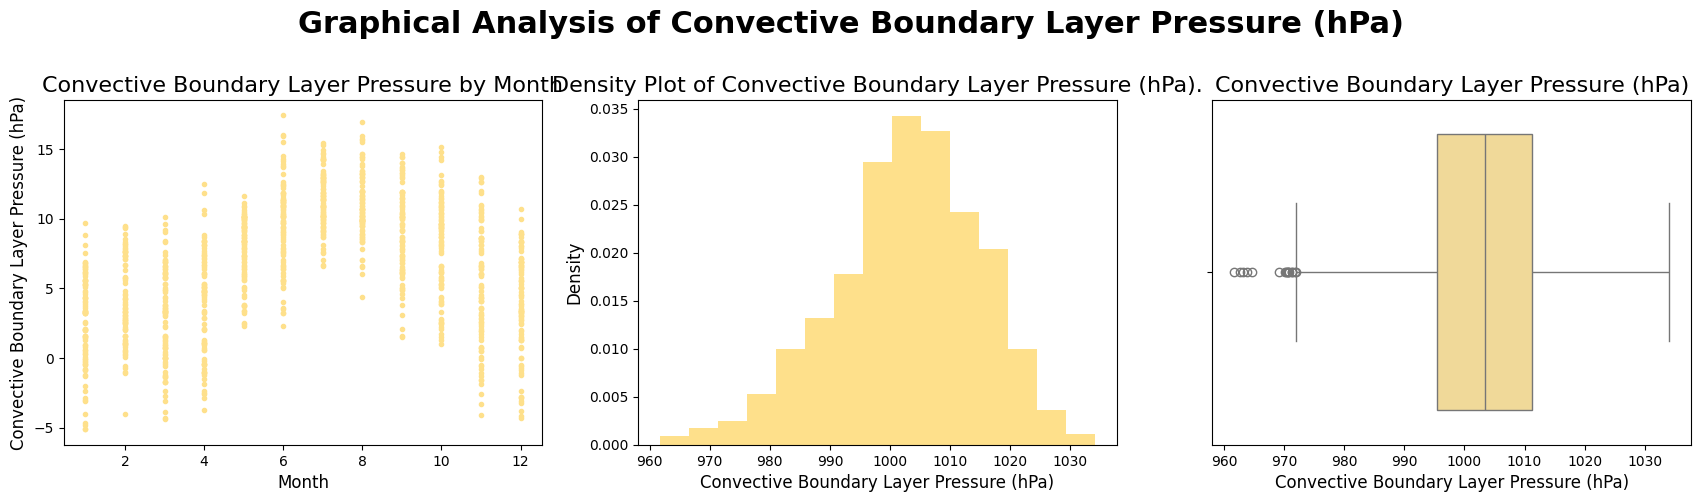

In [13]:
cbl = df_new['cbl']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Convective Boundary Layer Pressure (hPa)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Convective Boundary Layer Pressure by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#fee08b')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Convective Boundary Layer Pressure (hPa)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(cbl, density = True, bins = 15, color = '#fee08b')
plt.title("Density Plot of Convective Boundary Layer Pressure (hPa).", fontsize = 16)
plt.xlabel("Convective Boundary Layer Pressure (hPa)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'cbl', color = '#fee08b')
plt.title("Convective Boundary Layer Pressure (hPa)", fontsize = 16)
plt.xlabel("Convective Boundary Layer Pressure (hPa)", fontsize = 12)



1. Scatter Plot
- Convective boundary layer pressure varies seasonally, with higher values generally observed from May to August.
- Most data points fall between 990 hPa and 1015 hPa, with a few values outside this range.
- Suggests pressure levels are relatively stable throughout the year with slight summer elevation.

2. Histogram
- Most pressure values are concentrated between 995 hPa and 1015 hPa.
- The distribution is slightly left-skewed, with fewer extremely low-pressure days.
- Indicates a normal atmospheric condition with occasional deviations.

3. Boxplot
- The IQR is from approximately 995 hPa to 1010 hPa, meaning 50% of the values are within this pressure range.
- The median value is around 1003 hPa.
- A few low outliers are visible below 970 hPa, suggesting occasional low-pressure events.


Text(0.5, 0, 'Wind Speed (knots)')

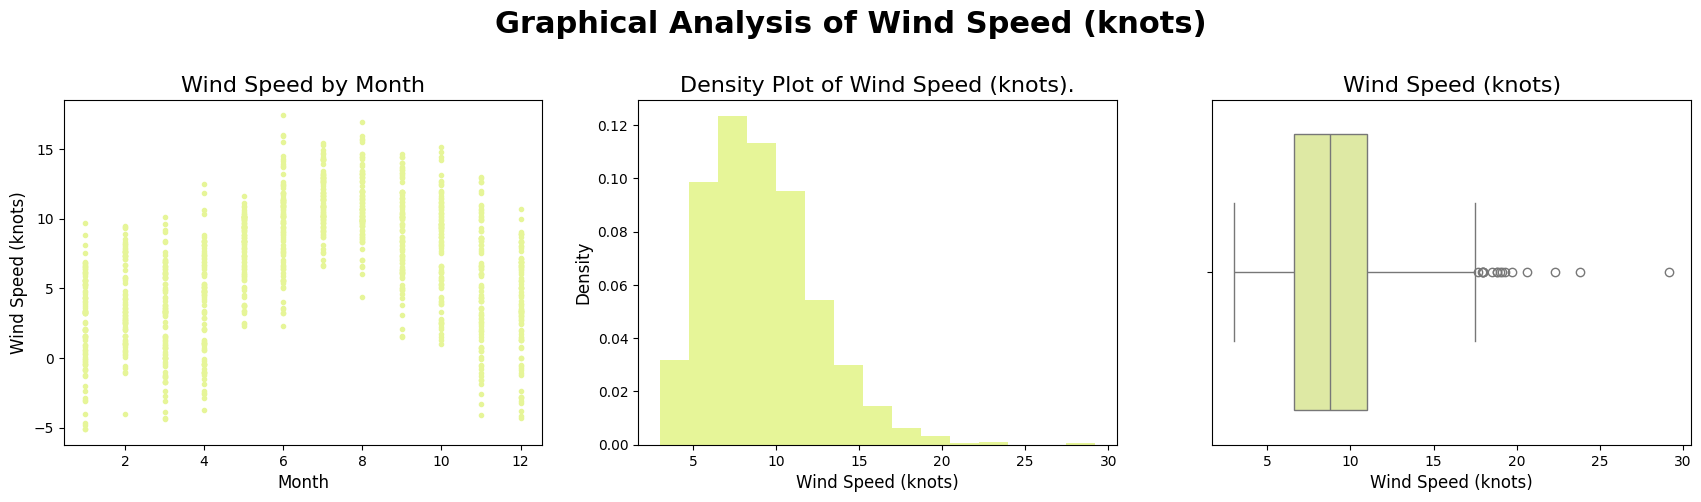

In [14]:
wdsp = df_new['wdsp']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Wind Speed (knots)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Wind Speed by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#e6f598')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Wind Speed (knots)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(wdsp, density = True, bins = 15, color = '#e6f598')
plt.title("Density Plot of Wind Speed (knots).", fontsize = 16)
plt.xlabel("Wind Speed (knots)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'wdsp', color = '#e6f598')
plt.title("Wind Speed (knots)", fontsize = 16)
plt.xlabel("Wind Speed (knots)", fontsize = 12)






1. Scatter Plot
- Wind speed varies throughout the year, with slightly higher values observed during the spring and early summer months.
- Most values fall between 5 and 15 knots, with only a few observations exceeding 20 knots.
- Indicates relatively moderate and stable wind conditions, with occasional stronger winds.

2. Histogram
- Most wind speeds are concentrated between 6 and 12 knots.
- The distribution is moderately right-skewed, with fewer high-speed wind events above 20 knots.
- Reflects a dominance of mild to moderate wind days.

3. Boxplot
- The IQR is from approximately 7 knots to 11 knots, meaning 50% of the values are within this range.
- The median wind speed is around 9 knots.
- Several outliers exceed 20 knots, with a few extreme values close to 30 knots.


Text(0.5, 0, 'Highest Gust (knots)')

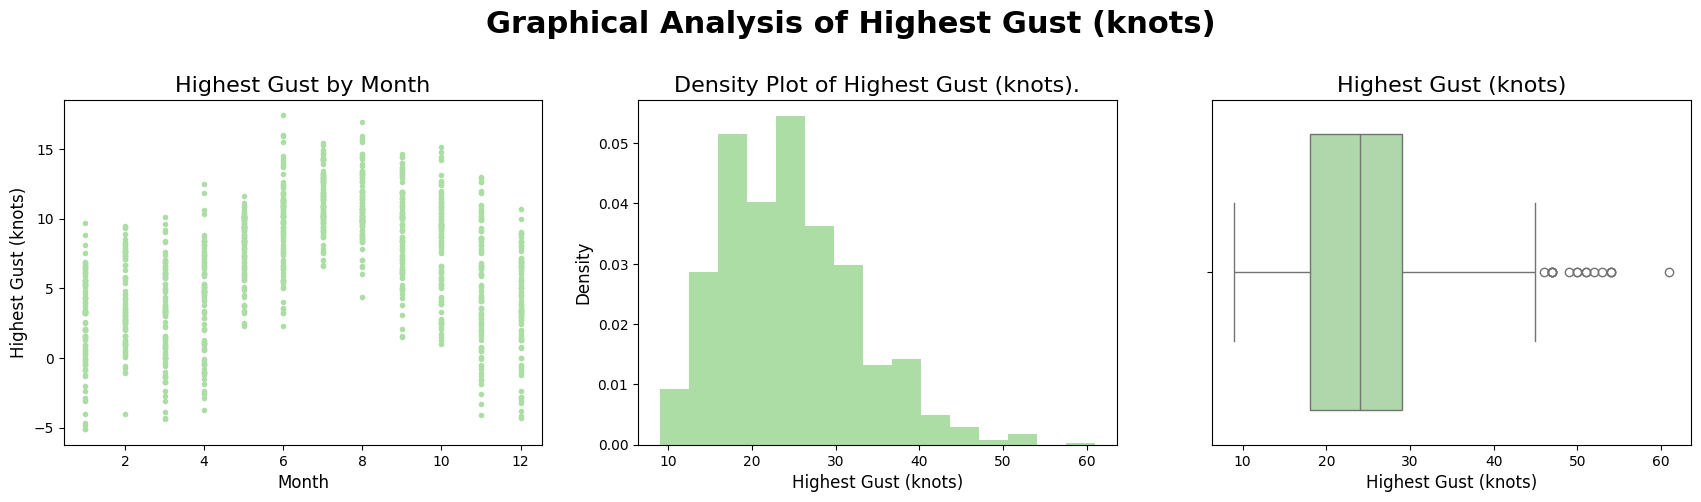

In [15]:
hg = df_new['hg']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Highest Gust (knots)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Highest Gust by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#abdda4')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Highest Gust (knots)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(hg, density = True, bins = 15, color = '#abdda4')
plt.title("Density Plot of Highest Gust (knots).", fontsize = 16)
plt.xlabel("Highest Gust (knots)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'hg', color = '#abdda4')
plt.title("Highest Gust (knots)", fontsize = 16)
plt.xlabel("Highest Gust (knots)", fontsize = 12)


1. Scatter Plot
- Highest gusts are recorded throughout the year, with relatively stronger gusts observed during spring and autumn months.
- Most values range between 15 and 35 knots, with several points exceeding 40 knots.
- Indicates occasional strong wind events alongside generally moderate gust conditions.

2. Histogram
- Most gust speeds are concentrated between 15 and 35 knots.
- The distribution is moderately right-skewed, with a tail extending toward extreme values over 50 knots.
- Strong gusts are less frequent but clearly present.

3. Boxplot
- The IQR is from approximately 18 knots to 30 knots, meaning 50% of the values fall within this range.
- The median gust speed is around 24 knots.
- Numerous outliers exceed 40 knots, with the highest recorded gust near 60 knots.


Text(0.5, 0, 'Sunshine Duration (hours)')

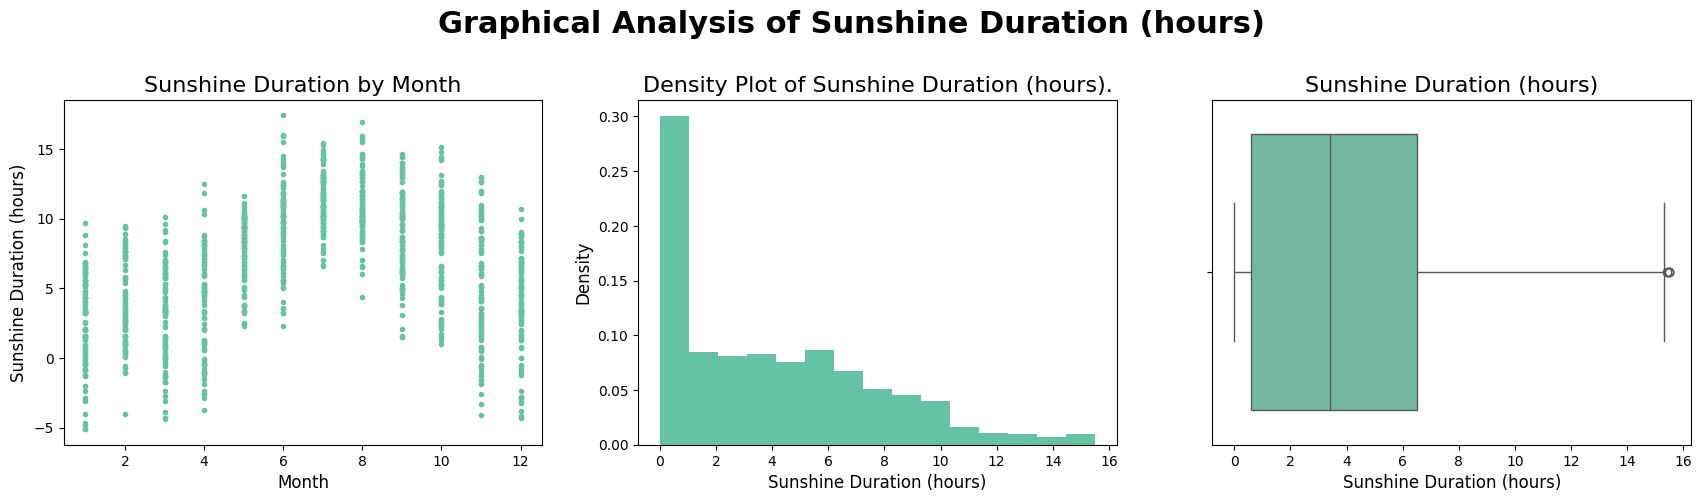

In [16]:
sun = df_new['sun']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Sunshine Duration (hours)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Sunshine Duration by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#66c2a5')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Sunshine Duration (hours)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(sun, density = True, bins = 15, color = '#66c2a5')
plt.title("Density Plot of Sunshine Duration (hours).", fontsize = 16)
plt.xlabel("Sunshine Duration (hours)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'sun', color = '#66c2a5')
plt.title("Sunshine Duration (hours)", fontsize = 16)
plt.xlabel("Sunshine Duration (hours)", fontsize = 12)

1. Scatter Plot
- Sunshine duration increases significantly during the summer months (May to August), often exceeding 10 hours.
- In winter months (November to February), most values are below 5 hours, with some close to 0.
- Reflects a strong seasonal pattern with longer daylight in summer and limited sunshine in winter.

2. Histogram
- Most sunshine durations are concentrated between 0 and 6 hours.
- The distribution is heavily right-skewed, with a large number of days having very low sunshine.
- Indicates that short-sunshine days are very common in Dublin.

3. Boxplot
- The IQR is from approximately 1 hour to 6.5 hours, meaning 50% of the values fall within this range.
- The median sunshine duration is around 4 hours.
- A few outliers reach up to 15 hours, typically during clear summer days.


Text(0.5, 0, 'Global Solar Radiation (J/cm²)')

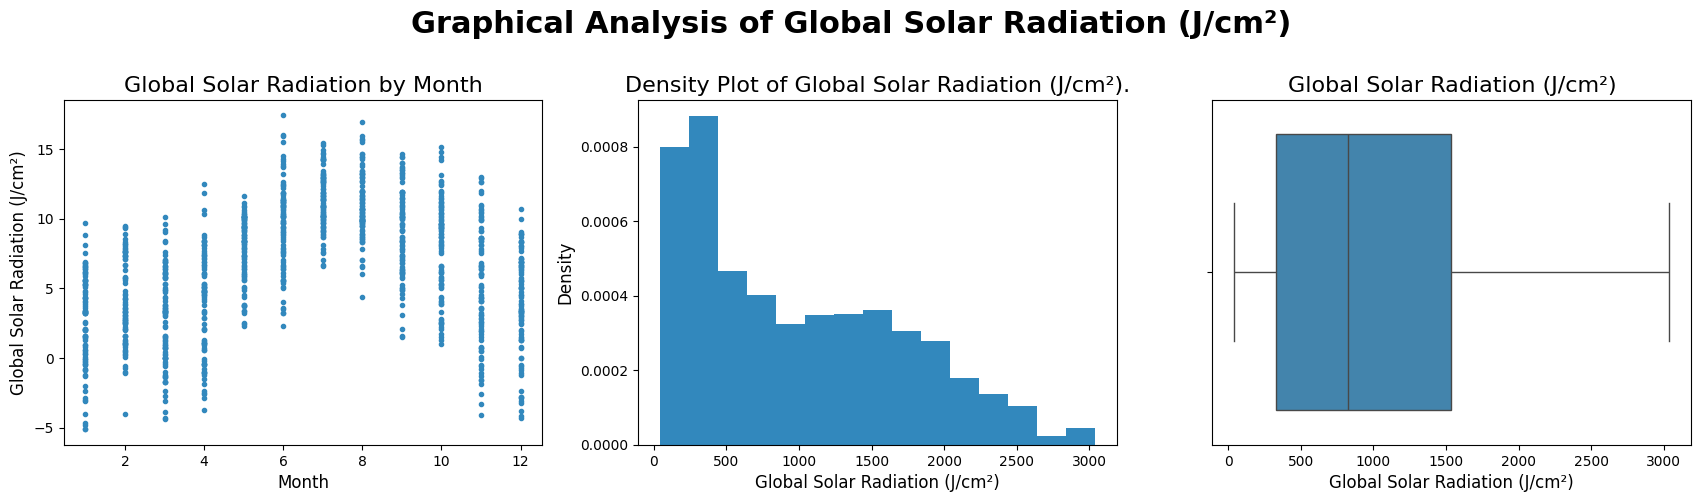

In [17]:
g_rad = df_new['g_rad']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Global Solar Radiation (J/cm²)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Global Solar Radiation by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#3288bd')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Global Solar Radiation (J/cm²)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(g_rad, density = True, bins = 15, color = '#3288bd')
plt.title("Density Plot of Global Solar Radiation (J/cm²).", fontsize = 16)
plt.xlabel("Global Solar Radiation (J/cm²)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'g_rad', color = '#3288bd')
plt.title("Global Solar Radiation (J/cm²)", fontsize = 16)
plt.xlabel("Global Solar Radiation (J/cm²)", fontsize = 12)



1. Scatter Plot
- Solar radiation increases significantly from spring to early summer (April to July), with many values above 1500 J/cm².
- During winter months (November to February), most values remain below 500 J/cm².
- Shows a strong seasonal pattern, with solar energy peaking in the summer.

2. Histogram
- Most values are concentrated between 0 and 1500 J/cm².
- The distribution is heavily right-skewed, with a long tail stretching toward 3000 J/cm².
- Indicates that low-radiation days are common, but high-radiation days also occur in smaller numbers.

3. Boxplot
- The IQR is from approximately 330 J/cm² to 1530 J/cm², meaning 50% of the values fall within this range.
- The median global solar radiation is around 820 J/cm².
- Several high-value outliers above 2500 J/cm² suggest clear, sunny days with intense radiation.


Text(0.5, 0, 'Potential Evapotranspiration (mm)')

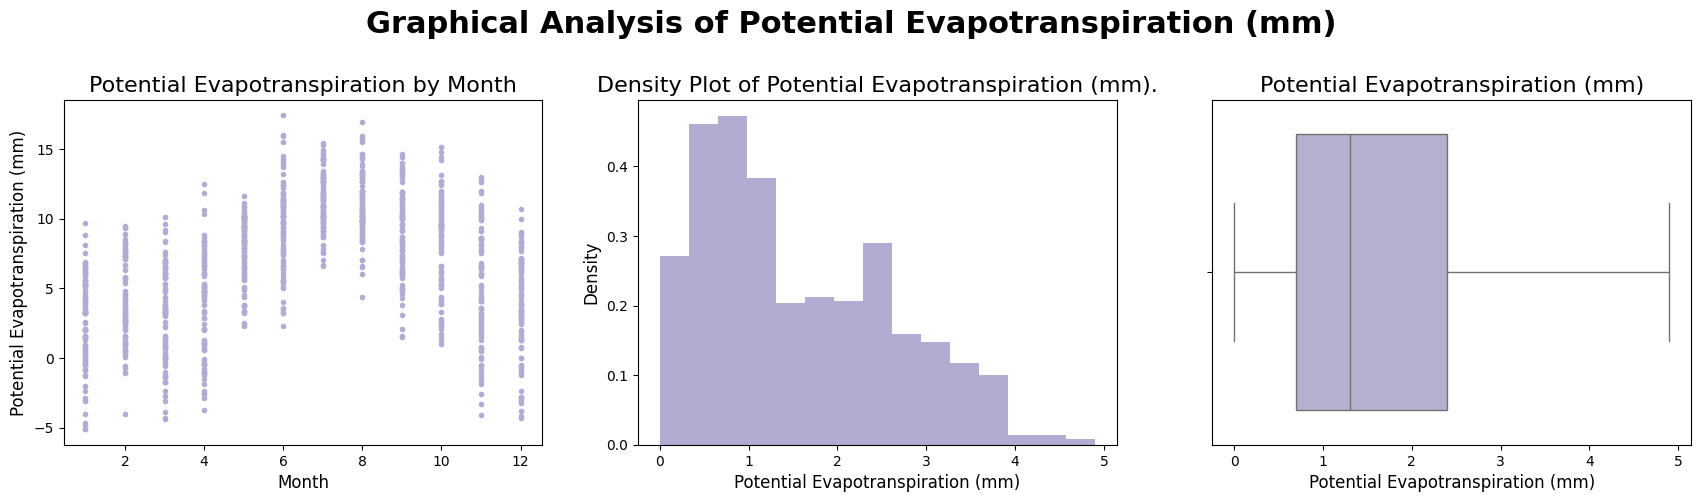

In [18]:
pe = df_new['pe']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Potential Evapotranspiration (mm)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Potential Evapotranspiration by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#b2abd2')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Potential Evapotranspiration (mm)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(pe, density = True, bins = 15, color = '#b2abd2')
plt.title("Density Plot of Potential Evapotranspiration (mm).", fontsize = 16)
plt.xlabel("Potential Evapotranspiration (mm)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'pe', color = '#b2abd2')
plt.title("Potential Evapotranspiration (mm)", fontsize = 16)
plt.xlabel("Potential Evapotranspiration (mm)", fontsize = 12)

1. Scatter Plot
- Potential evapotranspiration increases significantly during the warmer months (May to August), with values often above 2 mm.
- Winter months (December to February) show the lowest values, frequently below 1 mm.
- Highlights strong seasonal dependency driven by temperature and solar radiation.

2. Histogram
- Most daily values are concentrated between 0.5 mm and 2.5 mm.
- The distribution is moderately right-skewed, with fewer high values above 4 mm.
- Suggests that moderate levels of potential evapotranspiration are most common.

3. Boxplot
- The IQR is from approximately 0.7 mm to 2.4 mm, meaning 50% of the values fall within this range.
- The median potential evapotranspiration is around 1.5 mm.
- A few higher outliers above 4 mm are observed during peak summer days.


Text(0.5, 0, 'Actual Evaporation (mm)')

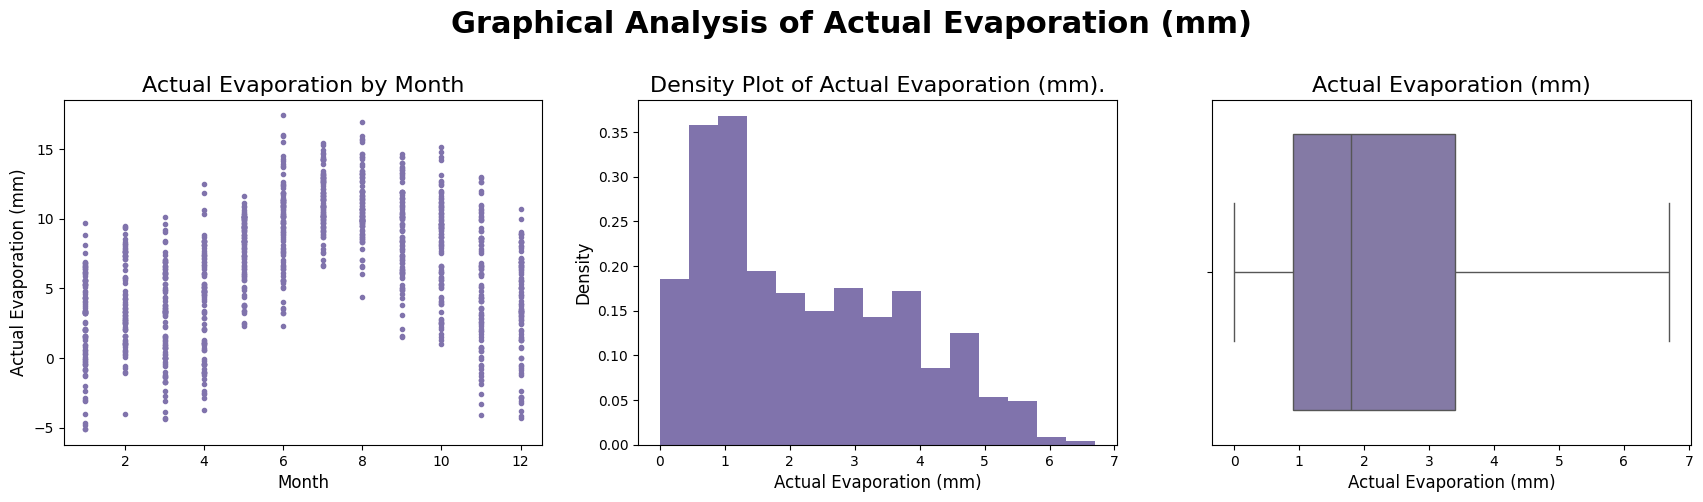

In [19]:
evap = df_new['evap']

plt.figure(figsize=(21,5))
plt.suptitle("Graphical Analysis of Actual Evaporation (mm)", fontsize = 22, fontweight = "bold")
plt.subplots_adjust(hspace = 0.4, top = 0.8)

plt.subplot(1,3,1)

plt.title("Actual Evaporation by Month", fontsize = 16)
plt.plot(month, mintp, '.', color='#8073ac')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Actual Evaporation (mm)", fontsize = 12)

plt.subplot(1,3,2)
plt.hist(evap, density = True, bins = 15, color = '#8073ac')
plt.title("Density Plot of Actual Evaporation (mm).", fontsize = 16)
plt.xlabel("Actual Evaporation (mm)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)

plt.subplot(1,3,3)
sns.boxplot(data = df_new, x = 'evap', color = '#8073ac')
plt.title("Actual Evaporation (mm)", fontsize = 16)
plt.xlabel("Actual Evaporation (mm)", fontsize = 12)



1. Scatter Plot
- Actual evaporation is higher during the summer months (May to August), often exceeding 3 mm per day.
- In winter (December to February), values frequently fall below 1 mm, with occasional near-zero readings.
- Shows a clear seasonal trend, with higher evaporation during warmer periods.

2. Histogram
- Most daily evaporation values are concentrated between 0.5 mm and 3.5 mm.
- The distribution is moderately right-skewed, with some higher values reaching above 6 mm.
- Indicates that moderate evaporation is common, while very high evaporation is rare.

3. Boxplot
- The IQR is from approximately 1.2 mm to 3.4 mm, meaning 50% of the values fall within this range.
- The median actual evaporation is around 2.2 mm.
- A few high outliers above 6 mm appear during peak summer days.


## 🔭Visualizasion

## 1. Scatter Plot (Maxtp VS Mintp)

In [26]:
import plotly.express as px

#year = df_new['date'].dt.year
df_new['year'] = df_new['date'].dt.year
df_new['year'] = df_new['year'].astype(str)

color_sequence = [
    "#d53e4f",  # 202(red)
    "#fee08b",  # 2023(yellow)
    "#3288bd"   # 2024(blue))
]

fig = px.scatter(
    df_new,
    x='mintp',
    y='maxtp',
    color='year',
    title='Max Temperature vs Min Temperature',
    labels={'mintp': 'Min Temperature (°C)', 'maxtp': 'Max Temperature (°C)'},
    color_discrete_sequence=color_sequence
)

fig.update_traces(marker=dict(size=6, opacity=0.6))
fig.show()


- The scatter plot reveals a **strong positive correlation** between minimum and maximum daily temperatures in Dublin from 2022 to 2024.   
- Temperature distributions are consistent across years. This indicates a stable and mild climate pattern over the period, typical of Dublin’s temperate maritime environment.

## 2. Bar Chart

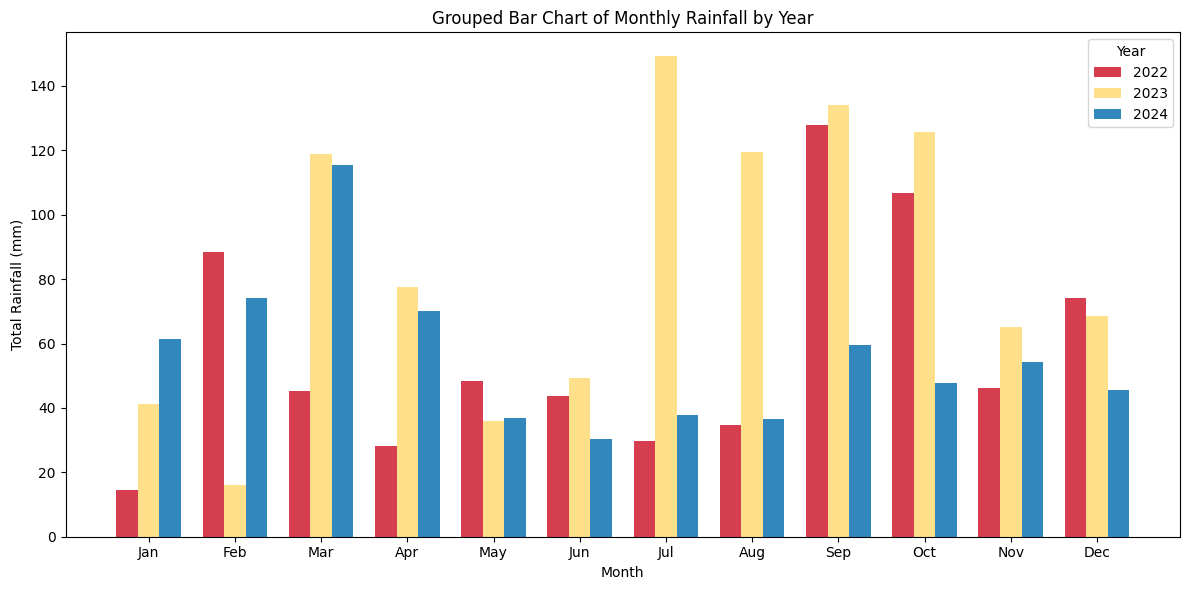

In [27]:
# ensure date format is correct
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['year'] = df_new['date'].dt.year
df_new['month'] = df_new['date'].dt.month

# group by year in each month
monthly_rain = df_new.groupby(['month', 'year'])['rain'].sum().unstack()

fig,ax = plt.subplots(figsize=(12, 6))

# x-axis
months = range(1, 13)
bar_width = 0.25
years = monthly_rain.columns.tolist()
positions = [list(map(lambda x: x + i * bar_width, months)) for i in range(len(years))]

# color that coordinate with the previous part
custom_colors = ['#d53e4f', '#fee08b', '#3288bd']

# plot chart
for i, year in enumerate(years):
    ax.bar(positions[i], monthly_rain[year], width=bar_width, label=str(year), color=custom_colors[i])

# x-axis label centering
mid_positions = [p + bar_width for p in months]
ax.set_xticks(mid_positions)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Styling
ax.set_xlabel("Month")
ax.set_ylabel("Total Rainfall (mm)")
ax.set_title("Grouped Bar Chart of Monthly Rainfall by Year")
ax.legend(title='Year')
plt.tight_layout()
plt.show()


💧*The record of rainfall in 2023 looks crazy,especially on July, so I checked for the authenticity of dataset online, turns out it's confirmed the wettest year on record of Ireland.
https://www.met.ie/2023-confirmed-as-irelands-wettest-year-on-record*

- The grouped bar chart shows a clear difference in monthly rainfall distribution across 2022–2024.
- 2023 experienced significantly higher rainfall in most months, particularly - from July to October, aligning with official confirmation of it being the wettest year on record.
- 2022 had more uneven rainfall, with a dry early year and two peaks in February and September.
- 2024 displayed a relatively stable and moderate rainfall pattern across the months.

## 3. Line Chart

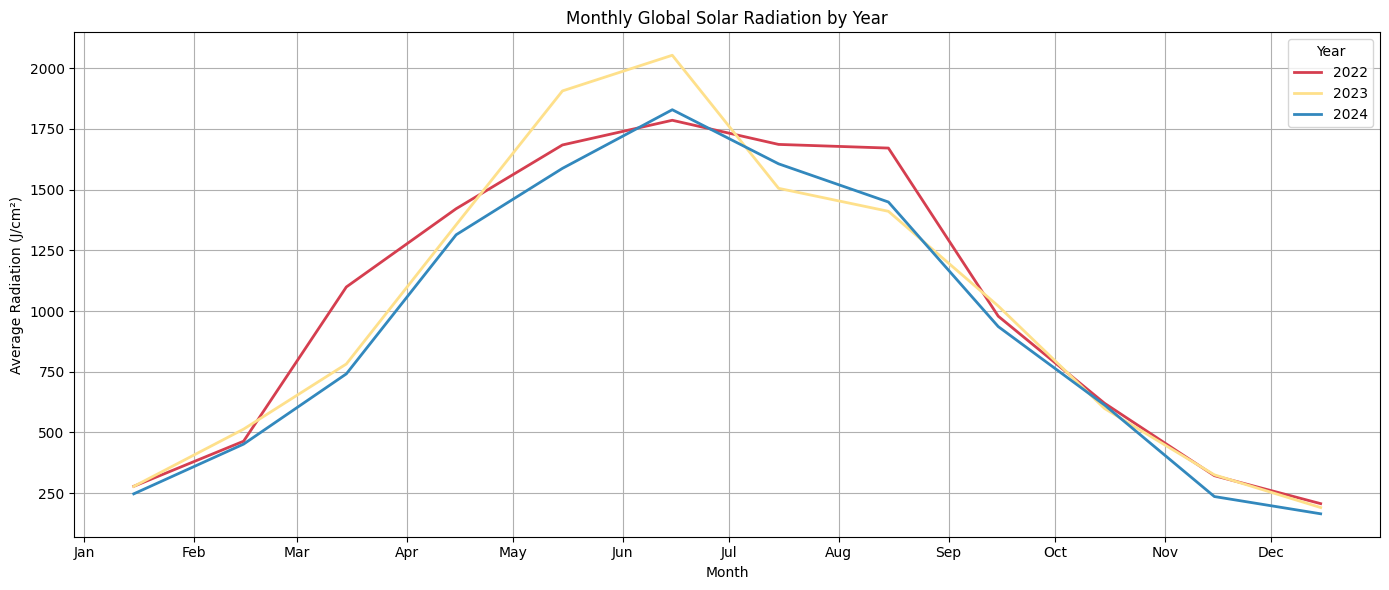

In [28]:
import matplotlib.dates as mdates

# group by year and month to get monthly mean of radiation
monthly_sun = df_new.groupby(['year', 'month'])['g_rad'].mean().reset_index()

# define ·virtual date· for alignment, or there will be layout issue
monthly_sun['virtual_date'] = pd.to_datetime({
    'year': 2000,
    'month': monthly_sun['month'],
    'day': 15
})


custom_colors = {
    2022: '#d53e4f',
    2023: '#fee08b',
    2024: '#3288bd'
}

# plot chart
plt.figure(figsize=(14, 6))

for year in sorted(monthly_sun['year'].unique()):
    year_data = monthly_sun[monthly_sun['year'] == year]
    plt.plot(
        year_data['virtual_date'],
        year_data['g_rad'],
        label=str(year),
        color=custom_colors.get(year, 'gray'),
        linewidth=2
    )

# Make it looks better
plt.title("Monthly Global Solar Radiation by Year")
plt.xlabel("Month")
plt.ylabel("Average Radiation (J/cm²)")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title="Year")
plt.tight_layout()
plt.show()



- The line chart demonstrates a clear seasonal pattern of global solar radiation in Dublin, with radiation levels peaking between May and July.
- 2023 experienced the highest solar radiation, especially in June, surpassing 2000 J/cm².
- 2024 consistently showed lower radiation levels across almost all months.
- The differences among years diminished significantly in the autumn and winter months, where radiation dropped consistently.

##4. Correlation Heatmap

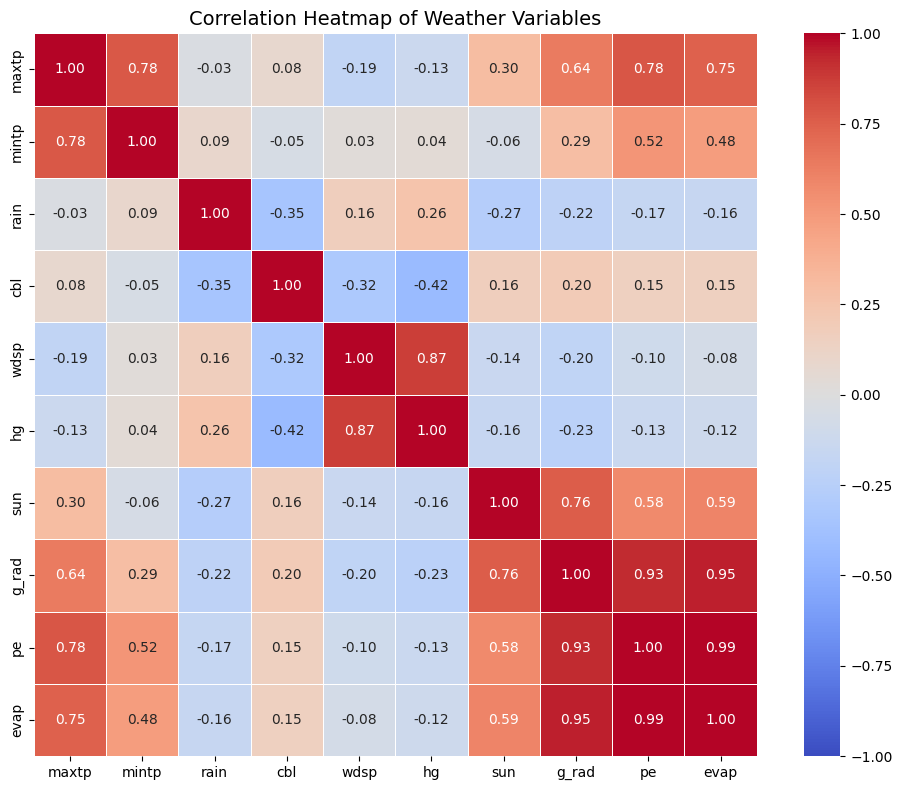

In [29]:
#Lab code adapted here

cols = ['maxtp', 'mintp', 'rain', 'cbl', 'wdsp', 'hg', 'sun', 'g_rad', 'pe', 'evap']
corr_matrix = df_new[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Weather Variables", fontsize=14)
plt.tight_layout()
plt.show()


- Evaporation (both pe and evap) is highly influenced by solar radiation and sunshine duration.
- Maximum temperature shows strong positive correlation with evaporation, suggesting heat-driven water loss.
- Rainfall is negatively correlated with sunshine and solar radiation, reflecting cloud cover effects.
- Wind-related variables (wdsp and hg) also exhibit strong internal correlation.

## 5. Scatter Plot (g_rad vs evap)

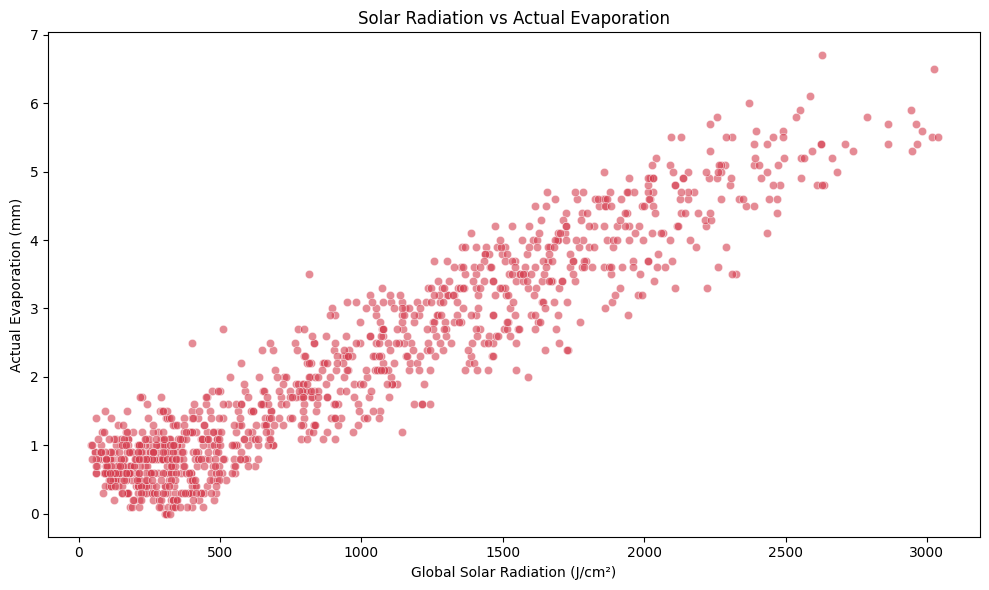

In [30]:
plt.figure(figsize=(10, 6))

plt.scatter(
    df_new['g_rad'],
    df_new['evap'],
    alpha=0.6,
    color='#d53e4f',
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Global Solar Radiation (J/cm²)')
plt.ylabel('Actual Evaporation (mm)')
plt.title('Solar Radiation vs Actual Evaporation')
plt.tight_layout()
plt.show()


- The scatter plot indicates a **strong positive linear relationship** between global solar radiation and actual evaporation.
- As solar energy increases, evaporation also rises, with particularly low evaporation observed during low-radiation days.
- This relationship is consistent with physical principles and is supported by the high correlation coefficient (0.95) observed in the correlation heatmap.
- This makes solar radiation a strong predictive variable for modeling evaporation.

## 6. Pie Chart
 Though pie chart is the least recommended chart in most situation, it could really tell the portion of rainny days by the occupation of the blue color.

In [35]:
def classify_rain(rain):
    if rain == 0:
        return 'No Rain'
    elif rain <= 0.1:
        return 'Trace Rain'
    elif rain <= 2.4:
        return 'Light Rain'
    elif rain <= 9.9:
        return 'Moderate Rain'
    else:
        return 'Heavy Rain'


df_new['rain_level'] = df_new['rain'].apply(classify_rain)


rain_summary = df_new.groupby(['year', 'rain_level']).size().reset_index(name='count')

color_map = {
    'No Rain': 'orangered',
    'Trace Rain': 'lightblue',
    'Light Rain': 'skyblue',
    'Moderate Rain': 'deepskyblue',
    'Heavy Rain': 'darkblue'
}



fig = px.pie(
    rain_summary,
    names='rain_level',
    values='count',
    color='rain_level',
    color_discrete_map=color_map,
    facet_col='year',
    title='Rainfall Distribution by WHO Rain Level (2022–2024)'
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    showlegend=False
)

fig.show()


- **Rainy days account for more than half of the calendar year in each observed year.**
- 2023 saw a noticeable decrease in dry days and a significant increase in heavy rainfall (8.2%), supporting its designation as the wettest year on record.
- Light rain remains the most frequent type of precipitation, highlighting the city's maritime climate.
- Trace rainfall was more present in 2024.

##🌦️ Analysis of Results
*Dublin’s weather could be unpredictable, subtle, and dramatic.*   

This analysis explores daily weather data from Dublin Airport between 2022 and 2024, covering 1096 rows with variables including max and min temperature, rainfall, sunshine duration, wind(2), solar radiation, and evaporation(2). After cleaning missing values using seasonal medians, we conducted exploratory data analysis and visualization plots to find meaningful insights.

🌡️ Temperature  
 Patterns showed mild seasonal cycles: max temperatures mostly ranged from 10–18°C, and minimums from 4–10°C. Scatter plots revealed strong alignment between min and max temperatures (correlation = 0.78), highlighting Dublin’s temperate maritime climate.

🌨️ Rainfall   
Patterns showed that over 50% of days in all years were rainy, mostly light rain (0.1–2.4mm). An exception was 2023, which experienced a surge in heavy rain days (8.2%), online national reports naming it the wettest year on record. Pie charts clearly visualised the year-on-year distribution shifts.

🌤️ Sunshine Duration and Solar Radiation   
Peaking in June–July. Line plots showed that 2023 also received more radiation than average, despite being wetter, due to more intense summer peaks. Scatter plots showed strong linear relationships between solar radiation and evaporation (correlation = 0.95), makes solar radiation a strong predictive variable for modeling evaporation.

💨 Wind   
Wind speed and gusts showed a high correlation (= 0.87). The correlation heatmap unveiled strong connections among radiation, evaporation, and temperature-related metrics, while rainfall and wind showed weaker or even negative associations with sun-related variables.

🌷 Seasonal Takeaways:  
Spring: unpredictable

Summer: bright, breezy, never hot

Autumn: rainfall increases and daylight declines

Winter: wet but not freezing — darkness is the main challenge, not the cold  

**In short，**there are rarely any weather extremes in Dublin, but the weather can still be full of surprises. Hope everyone reading this enjoys their time — come rain or shine.